In [1]:
from multicomp_cell import plot_data, BahlPyramidal
from pyneuroml.lems import LEMSSimulation
import matplotlib.pyplot as plt
import re
import os
import math
import logging
import sys
moduleName = __name__
currModule = sys.modules[moduleName]

logger_pynml = logging.getLogger('pyneuroml.pynml')
logger_pynml.setLevel(logging.ERROR)

plt.style.use('seaborn-white')

In [2]:
def file_content_line_by_line(directory):
    # Using readlines()
    models_param_dict = {}
    for filename in os.listdir(directory):
        modelname = filename.split(".")[0].split("_")[1]
        f = os.path.join(directory, filename)
        with open(f, 'r') as file1:
            Lines = file1.readlines()
            params = []
            param_names = []
            # Strips the newline character
            for line in Lines:
                if "=" in line:
                    val = line.split(" = ")[1]
                    name = line.split(" = ")[0].replace(" ", "_")
                    if 'e' in val:
                        val = str(float(val))
                    if(re.match(r'^-?\d+(?:\.\d+)$', val)):
                        val = float(val)
                        params.append(val)
                        param_names.append(name)
            models_param_dict[modelname]=params
    return param_names, models_param_dict

In [3]:
directory = "../NEURON/init_models_with_ca"
param_names, models_param_dict = file_content_line_by_line(directory)

In [4]:
def regenerate_and_run_model(duration_soma_pulse, amplitude_soma_pulse, amplitude_dendritic_pulse, start, end):    
    for model in models_param_dict:
        param_vals = models_param_dict[model]
        
        for j in range(len(param_vals)):
            setattr(currModule, param_names[j],param_vals[j])


        sim_id = "pyr_multi_comp"
        pyr = BahlPyramidal(forall_e_pas, Rm_axosomatic, forsec_axosomatic_list_cm, spinefactor, soma_gbar_nat, soma_gbar_kfast,
                    soma_gbar_kslow, soma_gbar_nap, soma_gbar_km, basal_gbar_ih, tuft_gbar_ih, tuft_gbar_nat,
                    decay_kfast, decay_kslow, hillock_gbar_nat, iseg_gbar_nat, iseg_vshift2_nat,
                    Ra_apical, tuft_gbar_sca, tuft_vshift_sca, tuft_gbar_kca,
                    amplitude_soma_pulse, duration_soma_pulse, amplitude_dendritic_pulse, model)
        pyr.run_simulation()
        plot_data(sim_id, start, end, model)

Models with the soma pulse as in the NEURON directory

/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='

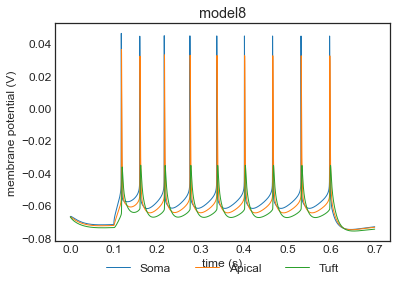

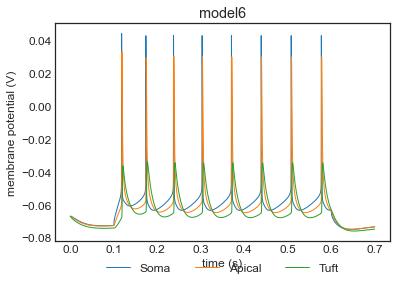

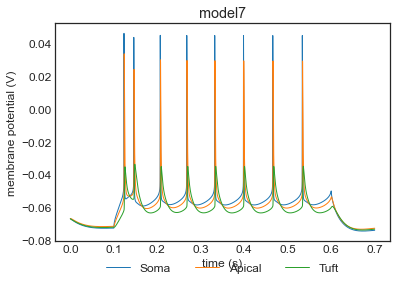

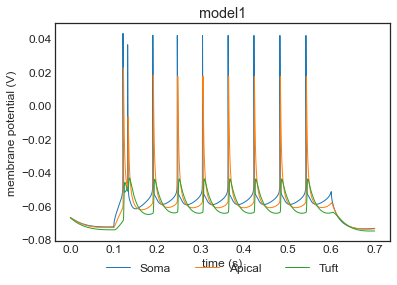

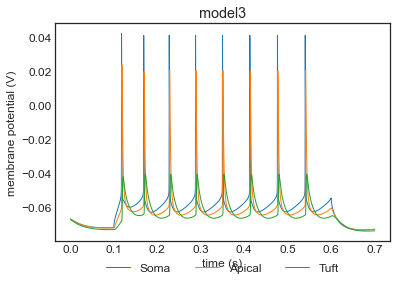

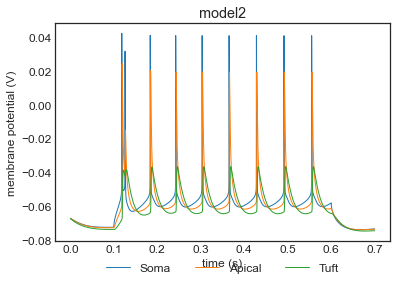

In [5]:
regenerate_and_run_model('500ms', '0.4nA', '0nA', 0, 140000)

#### Model results

(b) A small EPSP shaped dendritic current injection does not lead to spiking

/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='

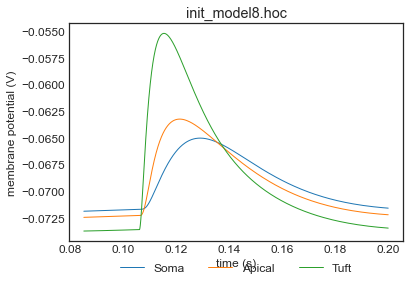

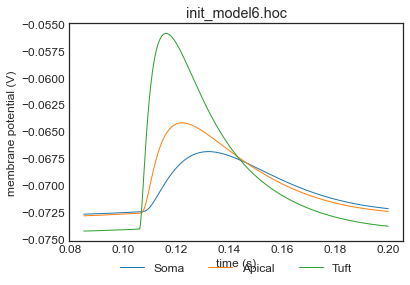

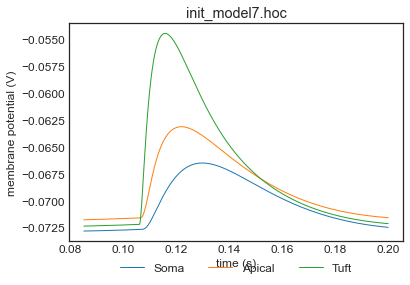

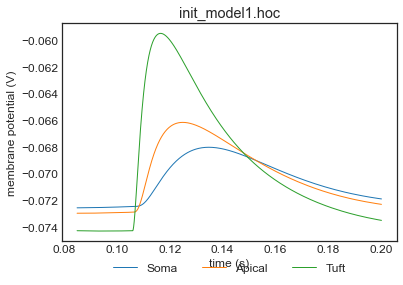

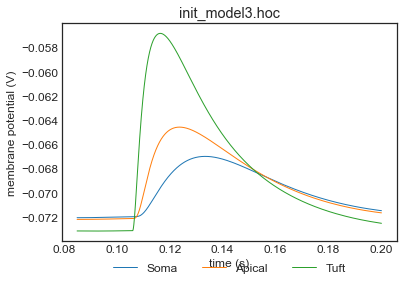

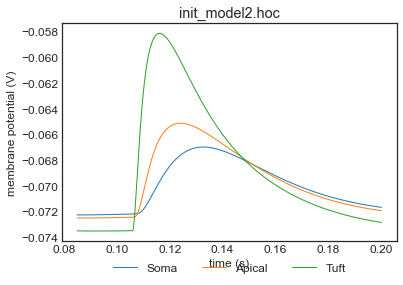

In [27]:
regenerate_and_run_model('5ms', '0nA', '1nA', 17000, 40000)

(c) A somatic current pulse elicits a single somatic spike that back-propagates into the dendrite without crossing the threshold for the initiation of dendritic calcium APs.

/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='

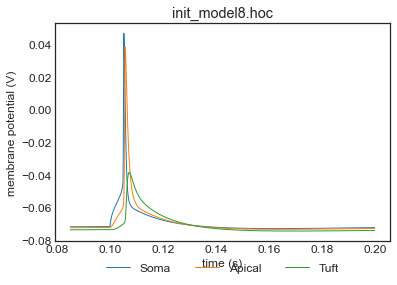

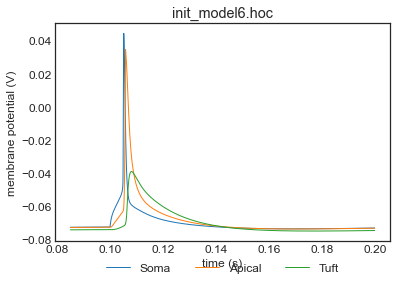

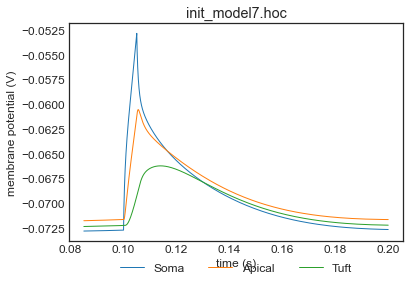

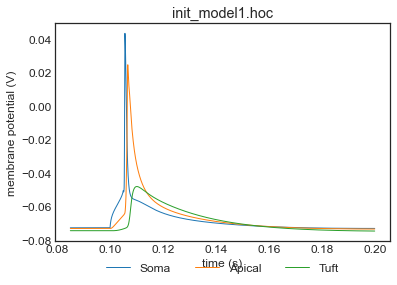

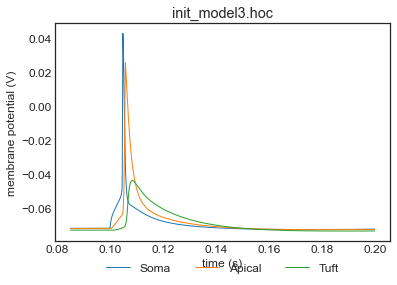

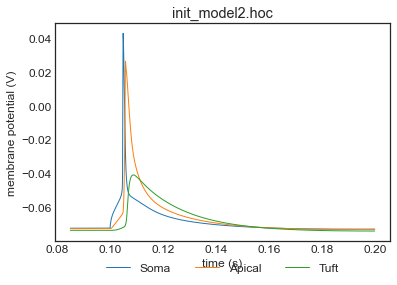

In [9]:
regenerate_and_run_model('5ms', '1nA', '0nA', 17000, 40000)

(d) A small dendritic current injection is added the threshold can be crossed and dendritic calcium spikes are elicited and eventually somatic bursting.

/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='

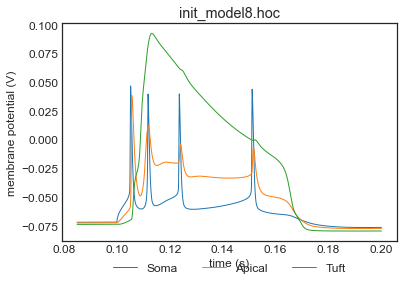

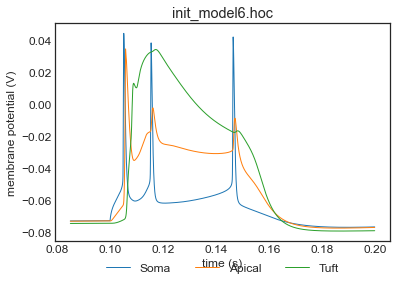

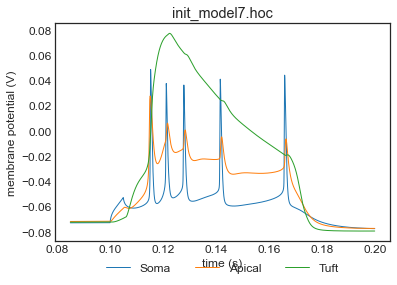

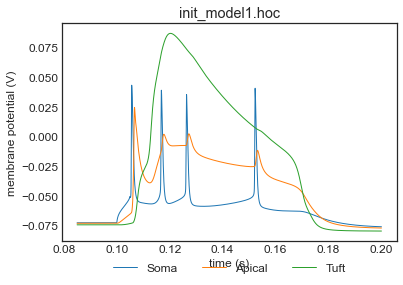

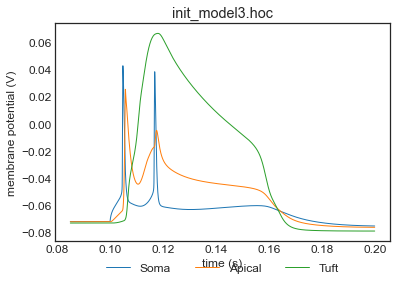

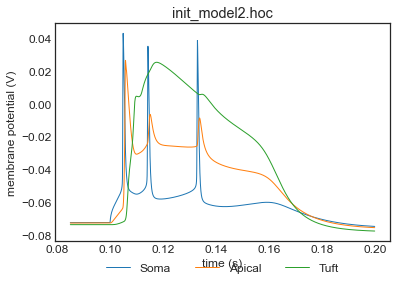

In [15]:
regenerate_and_run_model('5ms', '1nA', '1.8nA', 17000, 40000)

(e) A calcium spike can also be initiated locally in the dendrite when a strong dendritic current injection is used

/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(
/Users/shayan/opt/anaconda3/envs/neuron/lib/python3.10/site-packages/pyneuroml/pynml.py:2708: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='

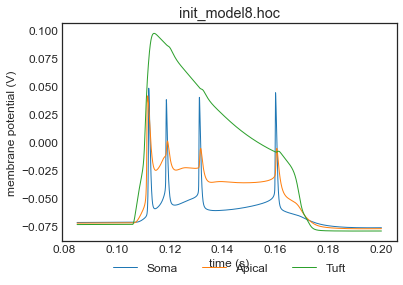

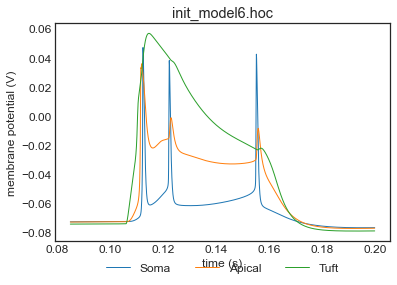

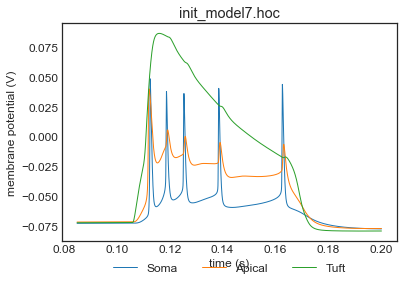

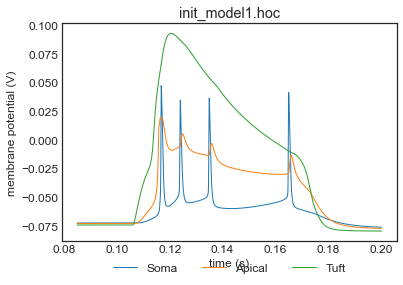

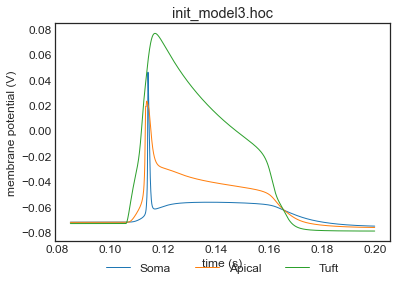

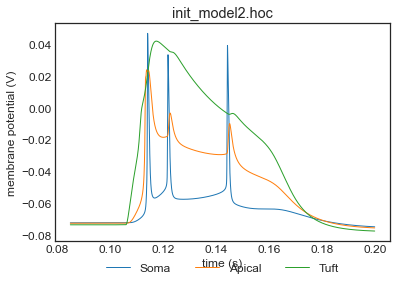

In [23]:
regenerate_and_run_model('0ms', '0nA', '3.6nA', 17000, 40000)

In [ ]:
# amplitude_dendrite_pulse='0.1nA'
# regenerate_and_run_model()
# plot_model_output()